In [4]:
class hanzi_simlar_enhance:
    
    @classmethod
    def initDict(cls, path):
        dict = {}
        with open(path, 'r', encoding='utf-8', errors='ignore') as f:
            for line in f.readlines():
                # 移除换行符，并且根据空格拆分
                splits = line.strip('\n').split(' ')
                key = splits[0]
                value = splits[1]
                dict[key] = value
        return dict
    
    def __init__(self, bihuashu_dict_path='./db/bihuashu_2w.txt', 
                 hanzijiegou_dict_path='./db/hanzijiegou_2w.txt', 
                 pianpangbushou_dict_path='./db/pianpangbushou_2w.txt',         
                 sijiaobianma_dict_path='./db/sijiaobianma_2w.txt',
                 hanzijiegouRate=10,
                 sijiaobianmaRate = 8,
                 pianpangbushouRate = 6,
                 bihuashuRate = 2
                 ) -> None:
        # ----- 基于笔画的数据增强字典 ---------
        self.bihuashuDict = self.initDict(bihuashu_dict_path)
        # ----- 基于汉字结构的数据增强字典 ---------
        self.hanzijiegouDict = self.initDict(hanzijiegou_dict_path)
        # ----- 基于汉字偏旁部首的增强字典 ---------
        self.pianpangbushouDict = self.initDict(pianpangbushou_dict_path)
        # ----- 基于汉字四角编码的增强字典 ---------
        self.sijiaobianmaDict = self.initDict(sijiaobianma_dict_path)
        
        self.hanzijiegouRate = hanzijiegouRate
        self.sijiaobianmaRate = sijiaobianmaRate
        self.pianpangbushouRate = pianpangbushouRate
        self.bihuashuRate = bihuashuRate
        
        
        
        
    
    def replace(sentence1, prob):
        """ 将句子中的汉字， 按照prob的概率替换成相近字, 从形成类似OCR识别错误的数据增强效果， 返回值为数据增后的句子
        """
        pass
    
    # 计算核心方法
    '''
    desc: 笔画数相似度, 字典中的内容为 {'单一汉字': 对应的笔画}
    '''
    def bihuashuSimilar(self, charOne, charTwo): 
        valueOne = self.bihuashuDict[charOne]
        valueTwo = self.bihuashuDict[charTwo]
        
        numOne = int(valueOne)
        numTwo = int(valueTwo)
        
        diffVal = 1 - abs((numOne - numTwo) / max(numOne, numTwo))
        return self.bihuashuRate * diffVal * 1.0


    '''
    desc: 汉字结构数相似度
    '''
    def hanzijiegouSimilar(self, charOne, charTwo): 
        valueOne = self.hanzijiegouDict[charOne]
        valueTwo = self.hanzijiegouDict[charTwo]
        
        if valueOne == valueTwo:
            # 后续可以优化为相近的结构
            return self.hanzijiegouRate * 1;
        return 0;
    
    '''
    desc: 四角编码相似度
    '''
    def sijiaobianmaSimilar(self, charOne, charTwo): 
        valueOne = self.sijiaobianmaDict[charOne];
        valueTwo = self.sijiaobianmaDict[charTwo];
        
        totalScore = 0.0;
        minLen = min(len(valueOne), len(valueTwo));
        
        for i in range(minLen):
            if valueOne[i] == valueTwo[i]:
                totalScore += 1.0;
        
        totalScore = totalScore / minLen * 1.0;
        return totalScore * self.sijiaobianmaRate;

    '''
    desc: 偏旁部首相似度
    '''
    def pianpangbushoutSimilar(self, charOne, charTwo): 
        valueOne = self.pianpangbushouDict[charOne];
        valueTwo = self.pianpangbushouDict[charTwo];
        
        if valueOne == valueTwo:
            # 后续可以优化为字的拆分
            return self.pianpangbushouRate * 1;
        return 0;  
    
    '''
    desc: 计算两个汉字的相似度
    '''
    def similar(self, charOne, charTwo):
        if charOne == charTwo:
            return 1.0;
        
        sijiaoScore = self.sijiaobianmaSimilar(charOne, charTwo) # 8.0   
        jiegouScore = self.hanzijiegouSimilar(charOne, charTwo)  # 10
        bushouScore = self.pianpangbushoutSimilar(charOne, charTwo) # 6
        bihuashuScore = self.bihuashuSimilar(charOne, charTwo);     # 1.4
        
        totalScore = sijiaoScore + jiegouScore + bushouScore + bihuashuScore # 25.428571428571427
        totalRate = self.hanzijiegouRate + self.sijiaobianmaRate + self.pianpangbushouRate + self.bihuashuRate # 26
        
        
        result = totalScore*1.0 / totalRate * 1.0;
        print('总分：' + str(totalScore) + ', 总权重: ' + str(totalRate) +', 结果:' + str(result));
        print('四角编码：' + str(sijiaoScore));
        print('汉字结构：' + str(jiegouScore));
        print('偏旁部首：' + str(bushouScore));
        print('笔画数：' + str(bihuashuScore));
        return result;
  
model = hanzi_simlar_enhance()   
model.similar('末', '来') 

总分：25.428571428571427, 总权重: 26, 结果:0.978021978021978
四角编码：8.0
汉字结构：10
偏旁部首：6
笔画数：1.4285714285714286


0.978021978021978

In [6]:
model.hanzijiegouDict.keys()

dict_keys(['丨', '亅', '乀', '乁', '丿', '一', '乙', '乛', '乚', '丶', '丩', '乃', '乄', '九', '了', '丁', '七', '乜', '丷', '八', '勹', '匕', '冫', '卜', '厂', '刀', '刁', '刂', '儿', '二', '匚', '阝', '几', '卩', '冂', '力', '冖', '凵', '人', '亻', '入', '十', '厶', '匸', '讠', '廴', '又', '丬', '丫', '久', '么', '丸', '万', '三', '上', '下', '与', '丈', '乞', '习', '乡', '也', '之', '义', '勺', '刃', '亏', '于', '凡', '卫', '个', '亡', '叉', '及', '彳', '川', '辶', '寸', '大', '飞', '干', '工', '弓', '广', '己', '已', '彐', '彑', '巾', '口', '马', '门', '宀', '女', '犭', '山', '彡', '尸', '饣', '士', '才', '扌', '氵', '纟', '巳', '土', '囗', '夕', '小', '忄', '幺', '弋', '尢', '夂', '夊', '孑', '孓', '子', '孒', '卝', '丰', '中', '乏', '乌', '丹', '予', '书', '无', '不', '丑', '丐', '丏', '专', '为', '卞', '兂', '允', '元', '互', '井', '亓', '五', '云', '内', '円', '办', '冘', '內', '卅', '升', '卐', '午', '卍', '屯', '夭', '夫', '夬', '太', '巨', '开', '廿', '尺', '壬', '巴', '尤', '贝', '灬', '长', '车', '歹', '斗', '方', '父', '戈', '户', '火', '旡', '斤', '耂', '毛', '木', '朩', '牛', '牜', '爿', '片', '攵', '气', '欠', '犬', '日', '氏', '礻', '手', '水', '瓦', '王', '韦',

In [7]:
model.hanzijiegouDict.values()

dict_values(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [12]:
new_dict = {}
for hanzi_str, index in model.hanzijiegouDict.items():
    # print(f'hanzi_str:{hanzi_str},index:{index}')
    if index not in list(new_dict.keys()):
        new_dict[index] = []
    new_dict[index].append(hanzi_str)

In [13]:
new_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

In [16]:
new_dict['0']

['丨',
 '亅',
 '乀',
 '乁',
 '丿',
 '一',
 '乙',
 '乛',
 '乚',
 '丶',
 '丩',
 '乃',
 '乄',
 '九',
 '了',
 '丁',
 '七',
 '乜',
 '丷',
 '八',
 '勹',
 '匕',
 '冫',
 '卜',
 '厂',
 '刀',
 '刁',
 '刂',
 '儿',
 '二',
 '匚',
 '阝',
 '几',
 '卩',
 '冂',
 '力',
 '冖',
 '凵',
 '人',
 '亻',
 '入',
 '十',
 '厶',
 '匸',
 '讠',
 '廴',
 '又',
 '丬',
 '丫',
 '久',
 '么',
 '丸',
 '万',
 '三',
 '上',
 '下',
 '与',
 '丈',
 '乞',
 '习',
 '乡',
 '也',
 '之',
 '义',
 '勺',
 '刃',
 '亏',
 '于',
 '凡',
 '卫',
 '个',
 '亡',
 '叉',
 '及',
 '彳',
 '川',
 '辶',
 '寸',
 '大',
 '飞',
 '干',
 '工',
 '弓',
 '广',
 '己',
 '已',
 '彐',
 '彑',
 '巾',
 '口',
 '马',
 '门',
 '宀',
 '女',
 '犭',
 '山',
 '彡',
 '尸',
 '饣',
 '士',
 '才',
 '扌',
 '氵',
 '纟',
 '巳',
 '土',
 '囗',
 '夕',
 '小',
 '忄',
 '幺',
 '弋',
 '尢',
 '夂',
 '夊',
 '孑',
 '孓',
 '子',
 '孒',
 '卝',
 '丰',
 '中',
 '乏',
 '乌',
 '丹',
 '予',
 '书',
 '无',
 '不',
 '丑',
 '丐',
 '丏',
 '专',
 '为',
 '卞',
 '兂',
 '允',
 '元',
 '互',
 '井',
 '亓',
 '五',
 '云',
 '内',
 '円',
 '办',
 '冘',
 '內',
 '卅',
 '升',
 '卐',
 '午',
 '卍',
 '屯',
 '夭',
 '夫',
 '夬',
 '太',
 '巨',
 '开',
 '廿',
 '尺',
 '壬',
 '巴',
 '尤',
 '贝',
 '灬'

In [227]:
import random 
import numpy as np
# from nlpcda import RandomDeleteChar

class Text_aug:
    def __init__(self, similar_hanzi_path='./db/hanzi_similar_list.txt') -> None:
        with open(similar_hanzi_path, mode='r', encoding='utf-8') as reader:
            cons = reader.readlines()
            self.similar_dict = {}
            for con in cons:
                con = con.strip()
                main_word, similar_word = con.split(' ')       
                self.similar_dict[main_word] = similar_word
        # self.deleteor = RandomDeleteChar(create_num=3, change_rate=random_str_delete_prob) 
        
    def random_delete(self, sentence, length, mid_prob=0.8, endpoint_prob=0.6):
        # def delete_prob(index, length, avg_prob=avg_prob):
        #     # 定义一个概率函数，使得两端的概率较高，中间的概率较低
        #     # mid = length // 2
        #     # return avg_prob * ((abs(index - mid) / (mid + 1)) ** 2)
        #     # -----------------------------------------------
        #     mid = length // 2
        #     if length % 2 == 0:
        #         mid = mid - 0.5  # 确保中间位置正确处理
        #     distance_to_mid = abs(index - mid)
        #     return 0.3 * avg_prob * (1-(distance_to_mid / mid) ** 2) + avg_prob
        def delete_prob(index, length, mid_prob, endpoint_prob):
            def parabola_points(y1, y2, y3, x1, x2, x3):
                """ 根据3点坐标, 确定一个抛物线方程系数 """
                # 构建矩阵方程 Ax = b
                A = np.array([
                    [x1**2, x1, 1],
                    [x2**2, x2, 1],
                    [x3**2, x3, 1]
                ])
                b = np.array([y1, y2, y3])
                # 解线性方程组
                a, b, c = np.linalg.solve(A, b)
                return a, b, c
    
            def parabola_function(x, a, b, c):
                """ 有抛物线的方程系数，确定抛物线方程 """
                return a * x**2 + b * x + c
            
            left_point_x, left_point_y = 0, endpoint_prob
            mid_point_x, mid_point_y = length/2, mid_prob
            right_point_x, right_point_y = length, endpoint_prob
            
            a, b, c = parabola_points(left_point_y, mid_point_y, right_point_y, left_point_x, mid_point_x, right_point_x)
            # print(f"抛物线方程参数: a={a}, b={b}, c={c}")
            
            y_value = parabola_function(index, a, b, c)
            return y_value
        
        result = []
        length = len(sentence)
        
        for index, char in enumerate(sentence):
            if random.random() < delete_prob(index, length,mid_prob, endpoint_prob):
                result.append(char)
        
        return ''.join(result)    
        
        
        
        
    def random_str_delete(self, sentence, prob=0.1):
        """ 句子中的字符， 由 prob的概率被删除
        """
        new_sentence = ''
        for str in sentence:
            if random.random() < prob:
                continue
            new_sentence += str
        return new_sentence
           
    def similar_str_replace(self, sentence, prob=0.9):
        """ 将句子中的汉字， 按照prob的概率替换成相近字, 从形成类似OCR识别错误的数据增强效果， 返回值为数据增后的句子
        """
        new_sentence = ''
        for word in sentence:
            replace_flag = False
            if word in self.similar_dict:
                if random.random() < prob:   
                    new_sentence += random.choice(self.similar_dict[word])
                    replace_flag = True
                    
            if not replace_flag:
                new_sentence += word
        return new_sentence      
    
    def __call__(self, sentence, mid_prob=0.9, endpoint_prob=0.7, similar_re_prob=0.1):
        """ mid_prob: 句子中心字符，保留下来的概率
            endpoint_prob: 句子的2端字符, 保留下来的概率
            similar_re_prob: 句子中 相似文字替换的概率
        """
        sentence = self.random_delete(sentence, mid_prob, endpoint_prob)
        sentence = self.similar_str_replace(sentence, similar_re_prob)
        return sentence

Text_auger = Text_aug()     
Text_auger('中华人民共和国!!')
                
                


'中华人膄国!!'

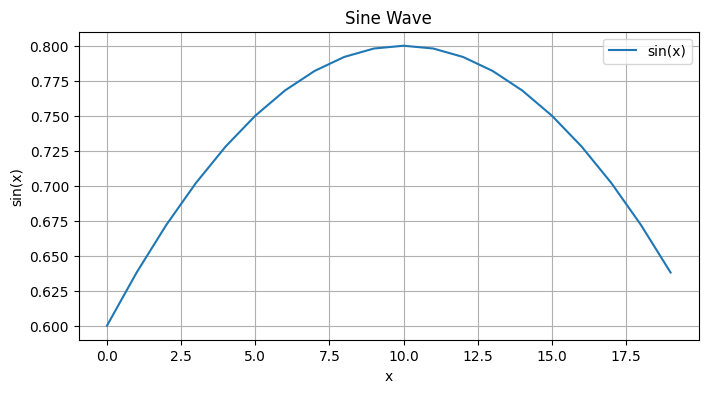

In [210]:
# 构建抛物线方程，确定在一个句子中，不同位置的字符被删除的概率!!!
import numpy as np
import matplotlib.pyplot as plt

def delete_prob(index, length, mid_prob=0.8, endpoint_prob=0.6):
    def parabola_points(y1, y2, y3, x1, x2, x3):
        """ 根据3点坐标, 确定一个抛物线方程系数 """
        # 构建矩阵方程 Ax = b
        A = np.array([
            [x1**2, x1, 1],
            [x2**2, x2, 1],
            [x3**2, x3, 1]
        ])
        b = np.array([y1, y2, y3])
        # 解线性方程组
        a, b, c = np.linalg.solve(A, b)
        return a, b, c
    
    def parabola_function(x, a, b, c):
        """ 有抛物线的方程系数，确定抛物线方程 """
        return a * x**2 + b * x + c
    
    left_point_x, left_point_y = 0, endpoint_prob
    mid_point_x, mid_point_y = length/2, mid_prob
    right_point_x, right_point_y = length, endpoint_prob
    
    a, b, c = parabola_points(left_point_y, mid_point_y, right_point_y, left_point_x, mid_point_x, right_point_x)
    # print(f"抛物线方程参数: a={a}, b={b}, c={c}")
    
    y_value = parabola_function(index, a, b, c)
    return y_value


x = [i for i in range(20)]
y = [ delete_prob(i, len(x)) for i in x]

# 创建图形
plt.figure(figsize=(8, 4))  # 设置图形的大小
plt.plot(x, y, label='sin(x)')  # 绘制曲线

# 添加标题和标签
plt.title('Sine Wave')  # 图形标题
plt.xlabel('x')  # x轴标签
plt.ylabel('sin(x)')  # y轴标签

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [77]:
y

[1.0,
 0.9977839335180055,
 0.9911357340720222,
 0.9800554016620499,
 0.9645429362880886,
 0.9445983379501385,
 0.9202216066481994,
 0.8914127423822715,
 0.8581717451523546,
 0.8204986149584488,
 0.778393351800554,
 0.7318559556786703,
 0.6808864265927979,
 0.6254847645429362,
 0.5656509695290859,
 0.5013850415512464,
 0.43268698060941835,
 0.35955678670360103,
 0.2819944598337951,
 0.19999999999999996]

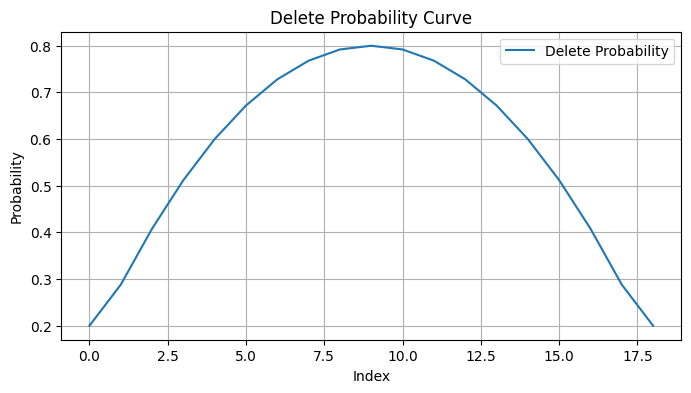

In [156]:
import numpy as np
import matplotlib.pyplot as plt

def delete_prob(index, length, avg_prob=0.8):
    # 定义一个概率函数，使得两端的概率较高，中间的概率较低
    mid = length // 2
    if index == 0 or index == length - 1:
        return 1 - avg_prob  # 确保两端的概率为1-avg_prob
    distance_to_mid = abs(index - mid)
    return avg_prob * (1 - (distance_to_mid / (mid + 1)) ** 2)

x = [i for i in range(19)]
y = [delete_prob(i, len(x), 0.8) for i in x]  # 使用avg_prob=0.8

# 创建图形
plt.figure(figsize=(8, 4))  # 设置图形的大小
plt.plot(x, y, label='Delete Probability')  # 绘制曲线

# 添加标题和标签
plt.title('Delete Probability Curve')  # 图形标题
plt.xlabel('Index')  # x轴标签
plt.ylabel('Probability')  # y轴标签

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

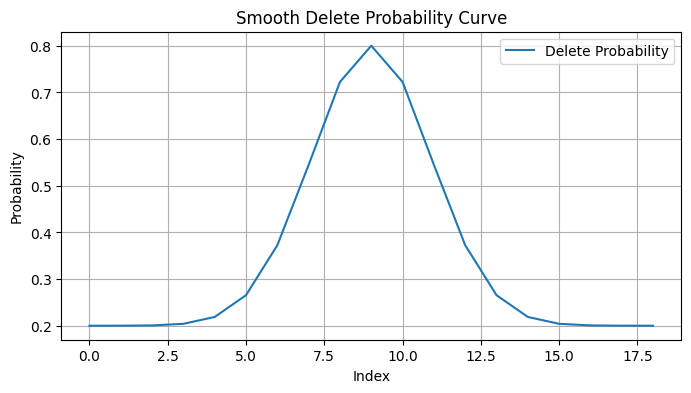

In [172]:
import numpy as np  
import matplotlib.pyplot as plt  
  
def delete_prob(index, length, avg_prob=0.8):  
    # 定义一个概率函数，使得两端的概率较高，中间的概率较低  
    mid = length // 2  
    if length % 2 == 0:  
        mid = mid - 0.5  # 修正中点为浮点数  
      
    # 计算距离中点的归一化距离  
    distance_to_mid = abs(index - mid) / (length / 2)  
      
    # 使用高斯衰减的变种，但调整参数以近似达到边界条件  
    # 注意：这里的sigma（标准差）需要调整以匹配您的需求  
    # 一个较小的sigma会使得曲线在中心附近更陡峭，在两端更平缓  
    sigma = 0.2  # 这个值需要根据实际情况进行调整  
    gaussian_factor = np.exp(-(distance_to_mid ** 2) / (2 * sigma ** 2))  
      
    # 构造一个从avg_prob到1-avg_prob的平滑过渡  
    # 这里我们使用一个简单的线性插值来近似，但也可以考虑使用其他更复杂的函数  
    # 注意：这种方法并不严格保证在端点处y=1-avg_prob，但会接近这个值  
    min_prob = avg_prob  # 最小概率，这里设为avg_prob（实际上可以更低）  
    max_prob = 1 - avg_prob  # 最大概率  
    prob_range = max_prob - min_prob  
    adjusted_prob = min_prob + prob_range * (1 - gaussian_factor)  
      
    # 由于我们想要在中间点处概率为avg_prob，我们可以稍微调整上述公式  
    # 但由于高斯函数在中间点是最大的，并且我们想要的是最小的概率avg_prob，  
    # 所以我们实际上不需要进一步调整，除非我们想要一个非对称的曲线  
      
    # 返回调整后的概率  
    return adjusted_prob  
  
x = [i for i in range(19)]  
y = [delete_prob(i, len(x), 0.8) for i in x]  
  
# 创建图形（其余部分保持不变）  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, label='Delete Probability')  
plt.title('Smooth Delete Probability Curve')  
plt.xlabel('Index')  
plt.ylabel('Probability')  
plt.legend()  
plt.grid(True)  
plt.show()

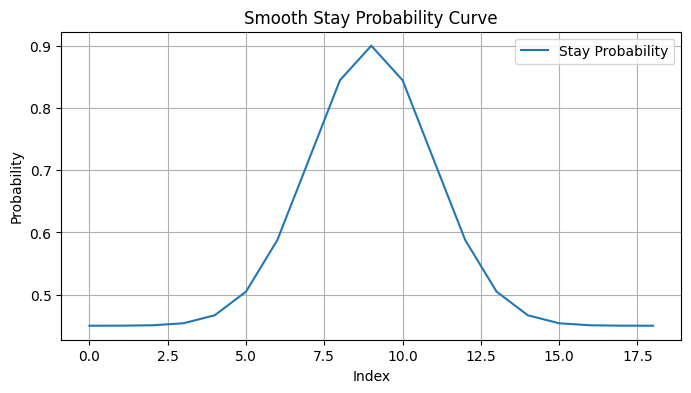

In [197]:
import numpy as np
import matplotlib.pyplot as plt

def delete_prob(index, length, avg_prob=0.8):
    mid = length // 2
    if length % 2 == 0:
        mid = mid - 0.5  # 修正中点为浮点数

    # 计算距离中点的归一化距离
    distance_to_mid = abs(index - mid) / (length / 2)

    # 使用高斯衰减的变种
    sigma = 0.2  # 这个值需要根据实际情况进行调整
    gaussian_factor = np.exp(-(distance_to_mid ** 2) / (2 * sigma ** 2))

    # 使用三次多项式来平滑曲线
    min_prob = avg_prob
    # max_prob = 1 - avg_prob 
    max_prob = avg_prob * 0.5
    prob_range = max_prob - min_prob
    adjusted_prob = min_prob + prob_range * (1 - (gaussian_factor ** 0.95))  # 使用三次方来增加平滑度

    return max(0,adjusted_prob)

x = [i for i in range(19)]
y = [delete_prob(i, len(x), 0.9) for i in x]

# 创建图形
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Stay Probability')
plt.title('Smooth Stay Probability Curve')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

抛物线方程参数: a=-0.020000000000000004, b=0.20000000000000004, c=0.3


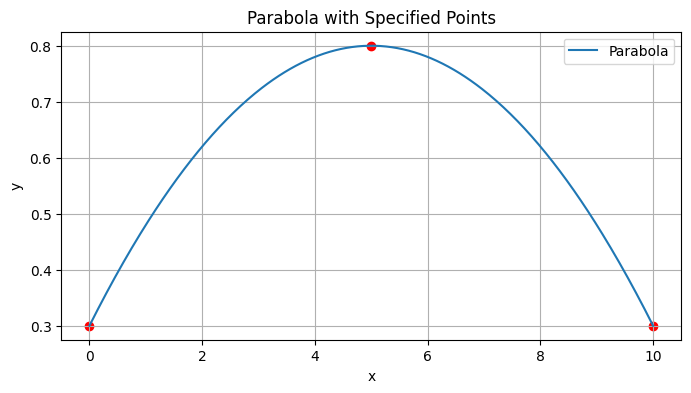

In [204]:
import numpy as np
def parabola_points(y1, y2, y3, x1, x2, x3):
    # 构建矩阵方程 Ax = b
    A = np.array([
        [x1**2, x1, 1],
        [x2**2, x2, 1],
        [x3**2, x3, 1]
    ])
    b = np.array([y1, y2, y3])
    
    # 解线性方程组
    a, b, c = np.linalg.solve(A, b)
    
    return a, b, c

def parabola_function(x, a, b, c):
    return a * x**2 + b * x + c

# 示例使用
y1, y2, y3 = 0.3, 0.8, 0.3  # 端点和中心点的y值
x1, x2, x3 = 0, 5, 10  # 端点和中心点的x值

a, b, c = parabola_points(y1, y2, y3, x1, x2, x3)
print(f"抛物线方程参数: a={a}, b={b}, c={c}")

# 创建一个函数来绘制抛物线
import matplotlib.pyplot as plt

x_values = np.linspace(x1, x3, 400)
y_values = parabola_function(x_values, a, b, c)

plt.figure(figsize=(8, 4))
plt.plot(x_values, y_values, label='Parabola')
plt.scatter([x1, x2, x3], [y1, y2, y3], color='red')  # 标记给定的点
plt.title('Parabola with Specified Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()